In [ ]:
!pip install mlxtend

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 3.2 MB/s 
     |████████████████████████████████| 1.1 MB 35.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=a1cb15138b46737a9ce310ed314d7f18af80ef7ad97ea024466438a3488c93a8
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=30a13c5288b6fc1f1e6a60a06a3937172401993f71d9e7f14c7fd94836f2e087
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/BADS7105/Cross-selling models/Customer Preference Survey (Responses) - Form Responses 1.csv'

In [ ]:
import pandas as pd

df = pd.read_csv(path)

In [ ]:
df.head(5)

,Timestamp,โปรแกรมแท้,เครื่องซักผ้า,NONE,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
0,10/28/2021 14:05:59,NaN,NaN,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
1,10/28/2021 14:06:18,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
2,10/28/2021 14:06:20,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,10/28/2021 14:06:21,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
4,10/28/2021 14:06:23,NaN,NaN,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [ ]:
df.replace(to_replace=['เคยซื้อ','ไม่เคยซื้อ','เคย','ไม่เคย','ตัวเลือก 1'], value=[1,0,1,0,1], inplace=True)
df = df.rename(columns={'คุณเคยซื้อโต๊ะปรับระดับหรือไม่': 'โต๊ะปรับระดับ'})

In [ ]:
df.tail(10)

,Timestamp,โปรแกรมแท้,เครื่องซักผ้า,NONE,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,โต๊ะปรับระดับ,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
19,10/28/2021 14:07:32,0.0,0.0,1.0,1,1,1,0,0,0,0,1,0,0,0,1,0.0,1,0,0,1,0,1,1,1,0,0,0
20,10/28/2021 14:07:37,1.0,0.0,1.0,1,0,1,0,1,1,0,1,0,0,0,1,0.0,0,1,0,1,0,0,0,0,0,1,1
21,10/28/2021 14:07:38,NaN,0.0,NaN,1,0,0,0,1,0,0,1,0,0,0,1,0.0,0,1,0,0,0,0,0,0,0,0,0
22,10/28/2021 14:07:41,0.0,1.0,0.0,1,0,1,0,1,0,0,1,0,1,0,1,1.0,1,0,0,1,1,1,1,0,1,0,0
23,10/28/2021 14:07:52,NaN,NaN,NaN,1,0,1,0,1,0,0,1,0,0,0,1,1.0,1,0,0,1,0,0,0,0,0,0,0
24,10/28/2021 14:08:10,1.0,0.0,0.0,1,0,1,0,0,0,0,1,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0
25,10/28/2021 14:08:14,1.0,0.0,0.0,1,1,1,1,1,0,0,1,0,0,0,1,0.0,1,0,0,1,0,0,0,0,0,0,0
26,10/28/2021 14:08:20,1.0,1.0,0.0,1,0,1,0,1,0,0,1,0,0,0,1,0.0,0,0,0,0,1,0,1,0,0,0,1
27,10/28/2021 14:08:30,1.0,1.0,0.0,1,0,1,1,0,0,0,1,0,0,0,1,1.0,0,0,1,1,1,1,0,1,0,0,1
28,10/28/2021 14:09:22,1.0,0.0,0.0,1,1,1,0,0,0,0,0,0,0,0,1,0.0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
df.drop('NONE',axis='columns', inplace=True)
df.drop('Timestamp',axis='columns', inplace=True)

In [ ]:
missing = df.isnull().sum()
print(missing)

โปรแกรมแท้                                14
เครื่องซักผ้า                             14
รองเท้าวิ่ง                                0
ผักกรอบ                                    0
คอร์สเรียนเสริม                            0
nintendo switch                            0
BTC (Bitcoin)                              0
mechanical keyboard                        0
เครื่องดูดฝุ่น Dyson                       0
เคส ipad                                   0
โต๊ะปรับระดับ                              0
สินค้าจากพิมรี่พาย                         0
I PHONE 13                                 0
หูฟัง bluetooth (airpods,truewireless)     0
แก้วน้ำ Starbucks                          1
เบาะรองนั่ง                                0
เครื่องชงกาแฟแคปซูล                        0
ตั๋วเครื่องบินไปญี่ปุ่น                    0
Ebook                                      0
ตู้เย็น                                    0
กล้องฟิล์ม                                 0
เครื่องดนตรี                               0
whey prote

In [ ]:
df = df.fillna(0)

In [ ]:
missing = df.isnull().sum()
print(missing)

โปรแกรมแท้                                0
เครื่องซักผ้า                             0
รองเท้าวิ่ง                               0
ผักกรอบ                                   0
คอร์สเรียนเสริม                           0
nintendo switch                           0
BTC (Bitcoin)                             0
mechanical keyboard                       0
เครื่องดูดฝุ่น Dyson                      0
เคส ipad                                  0
โต๊ะปรับระดับ                             0
สินค้าจากพิมรี่พาย                        0
I PHONE 13                                0
หูฟัง bluetooth (airpods,truewireless)    0
แก้วน้ำ Starbucks                         0
เบาะรองนั่ง                               0
เครื่องชงกาแฟแคปซูล                       0
ตั๋วเครื่องบินไปญี่ปุ่น                   0
Ebook                                     0
ตู้เย็น                                   0
กล้องฟิล์ม                                0
เครื่องดนตรี                              0
whey protein                    

In [ ]:
df = df.rename_axis("transection", axis="index")

In [ ]:
df

,โปรแกรมแท้,เครื่องซักผ้า,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,โต๊ะปรับระดับ,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
transection,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,1,1,1,0,0,0,0,1,0,0,0,0,0.0,0,0,0,1,0,0,1,0,1,0,0
1,0.0,0.0,1,0,1,1,1,1,0,1,0,0,0,1,0.0,1,0,0,1,0,1,0,1,0,0,1
2,0.0,0.0,1,0,1,0,1,0,0,1,0,0,0,1,1.0,1,0,1,0,0,0,1,0,0,0,0
3,0.0,0.0,1,0,1,0,1,0,1,1,0,1,0,1,0.0,1,0,1,1,1,0,1,0,0,0,0
4,0.0,0.0,1,1,1,0,0,0,0,1,0,1,0,1,0.0,1,0,1,0,0,0,0,0,0,0,0
5,0.0,0.0,1,0,0,0,1,0,0,1,0,0,0,1,0.0,0,0,0,1,1,0,1,0,1,0,1
6,0.0,0.0,1,1,1,0,0,0,0,0,0,0,0,1,0.0,0,0,0,0,1,0,0,0,1,0,0
7,0.0,0.0,1,0,1,0,0,0,0,1,0,0,0,1,1.0,1,0,1,0,0,0,1,0,0,0,1
8,0.0,0.0,1,1,1,1,0,0,0,1,0,0,0,1,0.0,1,0,0,1,0,0,1,0,0,0,0


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_df = df.applymap(encode_units)

In [ ]:
hot_encoded_df.head(5)

,โปรแกรมแท้,เครื่องซักผ้า,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,โต๊ะปรับระดับ,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
transection,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
1,0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1
2,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0
3,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0
4,0,0,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(hot_encoded_df, min_support=0.1, use_colnames=True) 

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.02) 
rules.tail(10) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
65732,"(รองเท้าวิ่ง, เบาะรองนั่ง)","(ตู้เย็น, เครื่องดนตรี, ตั๋วเครื่องบินไปญี่ปุ่...",0.517241,0.103448,0.103448,0.200000,1.933333,0.049941,1.120690
65733,"(เคส ipad, รองเท้าวิ่ง)","(ตู้เย็น, เครื่องดนตรี, ตั๋วเครื่องบินไปญี่ปุ่...",0.862069,0.103448,0.103448,0.120000,1.160000,0.014269,1.018809
65734,(ตู้เย็น),"(เครื่องดนตรี, ตั๋วเครื่องบินไปญี่ปุ่น, คอร์สเ...",0.413793,0.103448,0.103448,0.250000,2.416667,0.060642,1.195402
65735,(เครื่องดนตรี),"(ตู้เย็น, ตั๋วเครื่องบินไปญี่ปุ่น, คอร์สเรียนเ...",0.551724,0.103448,0.103448,0.187500,1.812500,0.046373,1.103448
65736,(ตั๋วเครื่องบินไปญี่ปุ่น),"(ตู้เย็น, เครื่องดนตรี, คอร์สเรียนเสริม, Ebook...",0.310345,0.172414,0.103448,0.333333,1.933333,0.049941,1.241379
65737,(คอร์สเรียนเสริม),"(ตู้เย็น, เครื่องดนตรี, ตั๋วเครื่องบินไปญี่ปุ่...",0.931034,0.103448,0.103448,0.111111,1.074074,0.007134,1.008621
65738,(Ebook),"(ตู้เย็น, เครื่องดนตรี, ตั๋วเครื่องบินไปญี่ปุ่...",0.655172,0.103448,0.103448,0.157895,1.526316,0.035672,1.064655
65739,(เบาะรองนั่ง),"(ตู้เย็น, เครื่องดนตรี, ตั๋วเครื่องบินไปญี่ปุ่...",0.551724,0.103448,0.103448,0.187500,1.812500,0.046373,1.103448
65740,(เคส ipad),"(ตู้เย็น, เครื่องดนตรี, ตั๋วเครื่องบินไปญี่ปุ่...",0.896552,0.103448,0.103448,0.115385,1.115385,0.010702,1.013493
65741,(รองเท้าวิ่ง),"(ตู้เย็น, เครื่องดนตรี, ตั๋วเครื่องบินไปญี่ปุ่...",0.965517,0.103448,0.103448,0.107143,1.035714,0.003567,1.004138


In [ ]:

simple_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1) & (rules['lift'] > 1.05) & (rules['confidence'] > 0.5)]
simple_rules.sort_values(by=['lift'],ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
217,(กล้องฟิล์ม),(whey protein),0.172414,0.206897,0.137931,0.800000,3.866667,0.102259,3.965517
216,(whey protein),(กล้องฟิล์ม),0.206897,0.172414,0.137931,0.666667,3.866667,0.102259,2.482759
139,(mechanical keyboard),(whey protein),0.172414,0.206897,0.103448,0.600000,2.900000,0.067776,1.982759
113,(nintendo switch),(whey protein),0.241379,0.206897,0.137931,0.571429,2.761905,0.087990,1.850575
112,(whey protein),(nintendo switch),0.206897,0.241379,0.137931,0.666667,2.761905,0.087990,2.275862
...,...,...,...,...,...,...,...,...,...
90,(คอร์สเรียนเสริม),(เบาะรองนั่ง),0.931034,0.551724,0.551724,0.592593,1.074074,0.038050,1.100313
150,(เคส ipad),(Ebook),0.896552,0.655172,0.620690,0.692308,1.056680,0.033294,1.120690
151,(Ebook),(เคส ipad),0.655172,0.896552,0.620690,0.947368,1.056680,0.033294,1.965517
72,(ผักกรอบ),"(หูฟัง bluetooth (airpods,truewireless))",0.344828,0.758621,0.275862,0.800000,1.054545,0.014269,1.206897


In [ ]:
#font setting
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns
import networkx as nx

font_path = '/content/drive/MyDrive/BADS7105/font/iannnnn-DOG-Regular.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [ ]:
#Visualization 
edgelist = []
for i,x in simple_rules.iterrows():
    n1, = x['antecedents']
    n2, = x['consequents']
    attr = { 'lift': round(x['lift'],4), 'confidence' : round(x['confidence'],4) }
    edgelist.append((n1,n2,attr))

nodes = { n1 for n1, n2, attr in edgelist}.union({ n2 for n1, n2, attr in edgelist})

support_df = frequent_itemsets[frequent_itemsets['itemsets'].apply(len)==1].copy()
support_df['item'] = support_df['itemsets'].apply(lambda x: list(x)[0])
support_df = support_df[support_df['item'].isin(nodes)]

nodelist = []
for i,x in support_df.iterrows():
    n = x['item']
    attr = { 'support' : round(x['support'],4) }
    nodelist.append((n, attr))

# create graph
G = nx.DiGraph()

G.add_nodes_from(nodelist)
G.add_edges_from(edgelist)

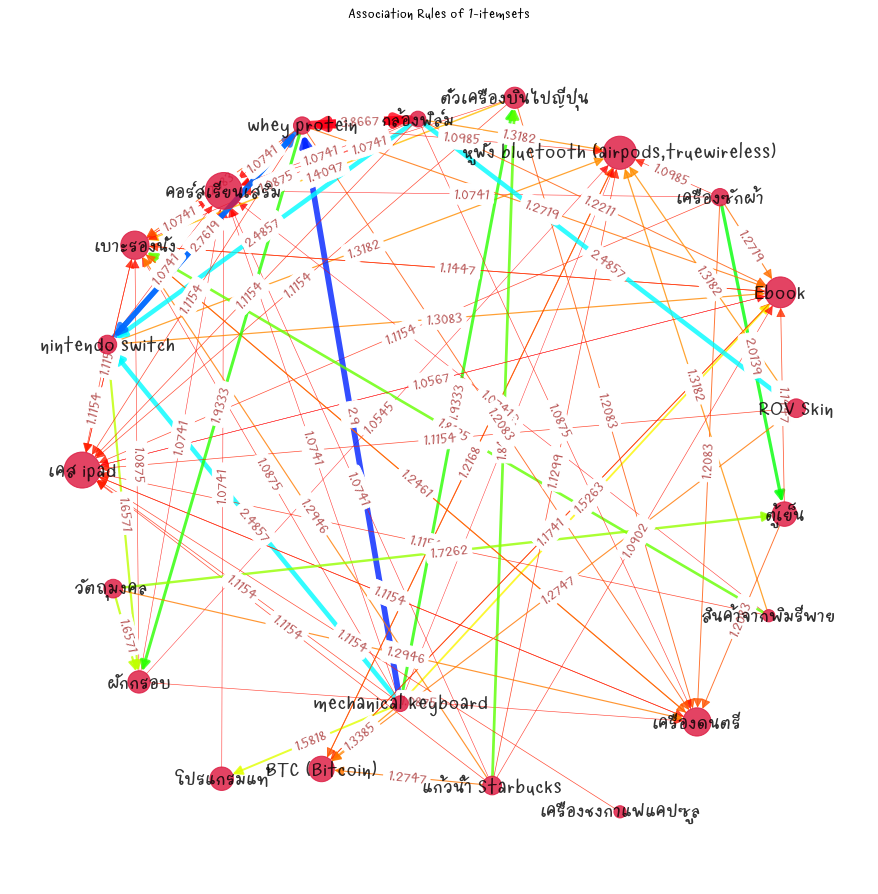

In [ ]:
import numpy as np
nodelist, node_size = zip(*[(n,d['support']) for n,d in G.nodes(data=True)])
node_size = 150 + ((np.array(node_size) - min(node_size)) / (max(node_size) - min(node_size)))*1200
edgelist, width = zip(*[((u,v), d['lift'])for u,v,d in G.edges(data=True)])

width = .5 + ((np.array(width) - min(width)) / (max(width) - min(width)))*8

labels_params = {'font_family': 'sans-serif', 'alpha':.8}

plt.figure(figsize=(12,12))


pos = nx.spring_layout(G, k=5, weight='lift', iterations=80, seed=90, scale=2.5)
nx.draw(G, pos, with_labels=True, arrowsize=20, 
        edgelist=edgelist, width=width, edge_color=width, edge_cmap=plt.cm.hsv, 
        nodelist=nodelist, node_size=node_size, node_color='crimson',font_size=18,
        **labels_params)
edge_labels = nx.get_edge_attributes(G, 'lift')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='brown', font_size=12,  **labels_params)

plt.title('Association Rules of 1-itemsets')
plt.savefig('First_rule_graph.png', dpi=120)

plt.show()


In [ ]:
item_item_matrix = pd.DataFrame(index=hot_encoded_df.columns,columns=hot_encoded_df.columns)

In [ ]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) : #
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(hot_encoded_df.iloc[:,i],hot_encoded_df.iloc[:,j])

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [ ]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [ ]:
links_filtered=links.loc[ (links['value'] > 0.5) & #กรอง cosione สูงๆ
                         (links['item'] != links['related item']) ]

In [ ]:
links_filtered.sort_values(by=['value'],ascending=False)

,item,related item,value
54,รองเท้าวิ่ง,คอร์สเรียนเสริม,0.945611
102,คอร์สเรียนเสริม,รองเท้าวิ่ง,0.945611
59,รองเท้าวิ่ง,เคส ipad,0.926562
227,เคส ipad,รองเท้าวิ่ง,0.926562
229,เคส ipad,คอร์สเรียนเสริม,0.905822
...,...,...,...
619,ROV Skin,กล้องฟิล์ม,0.507093
341,แก้วน้ำ Starbucks,ตั๋วเครื่องบินไปญี่ปุ่น,0.503953
402,ตั๋วเครื่องบินไปญี่ปุ่น,รองเท้าวิ่ง,0.503953
413,ตั๋วเครื่องบินไปญี่ปุ่น,แก้วน้ำ Starbucks,0.503953


Graph with 24 nodes and 64 edges


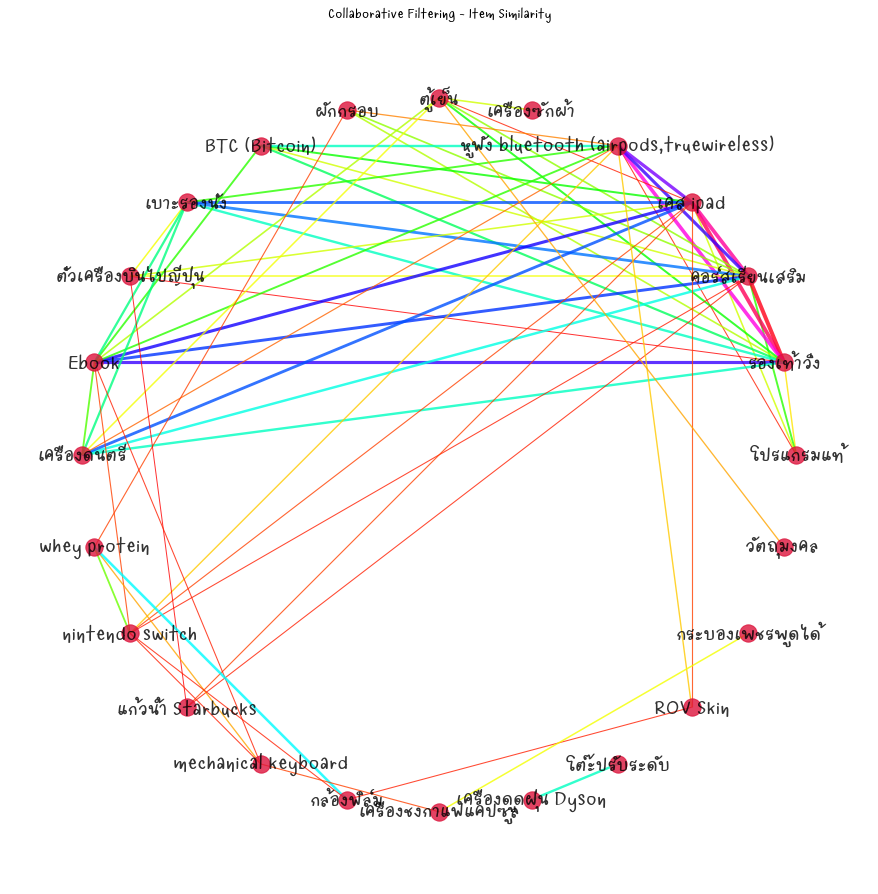

In [ ]:
G = nx.Graph()
G.add_weighted_edges_from([ (x['item'],x['related item'], round(x['value'],2)) for i,x in links_filtered.iterrows()])
print(nx.info(G))
labels_params = {'font_family': 'sans-serif', 'alpha':.8}

edgelist, weights = zip(*[((u,v), d['weight'])for u,v,d in G.edges(data=True)])
width = 1 + ((np.array(weights) - min(weights)) / (max(weights) - min(weights)))*3

plt.figure(figsize=(12,12))
pos = nx.circular_layout(G, scale=5)
nx.draw(G, pos, with_labels=True, node_color='crimson',font_size=18,
        edgelist=edgelist, width=width, 
        edge_color=weights, edge_cmap=plt.cm.hsv,
        **labels_params)
plt.title('Collaborative Filtering - Item Similarity')
plt.savefig('item_sim.png', dpi=120)
plt.show()